<a href="https://colab.research.google.com/github/m-poppins/practice/blob/master/Classification_into_several_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация новостных лент

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

%matplotlib inline

In [2]:
from keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [5]:
def vec_seq(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, s in enumerate(sequences):
        res[i, s] = 1.
    return res

In [6]:
X = vec_seq(X_train)
X_test = vec_seq(X_test)

from keras.utils.np_utils import to_categorical
y = to_categorical(y_train) 
y_test = to_categorical(y_test)

X_val = X[:1000]
X_train = X[1000:]
y_val = y[:1000]
y_train = y[1000:]

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
) 

In [16]:
history=model.fit(X_train, y_train, epochs=14, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/14
16/16 [==============================] - 1s 51ms/step - loss: 2.5521 - accuracy: 0.5372 - val_loss: 1.6939 - val_accuracy: 0.6560
Epoch 2/14
16/16 [==============================] - 1s 46ms/step - loss: 1.3911 - accuracy: 0.7106 - val_loss: 1.2929 - val_accuracy: 0.7110
Epoch 3/14
16/16 [==============================] - 1s 45ms/step - loss: 1.0435 - accuracy: 0.7811 - val_loss: 1.1065 - val_accuracy: 0.7530
Epoch 4/14
16/16 [==============================] - 1s 45ms/step - loss: 0.8228 - accuracy: 0.8296 - val_loss: 1.0311 - val_accuracy: 0.7850
Epoch 5/14
16/16 [==============================] - 1s 46ms/step - loss: 0.6577 - accuracy: 0.8631 - val_loss: 0.9563 - val_accuracy: 0.8130
Epoch 6/14
16/16 [==============================] - 1s 45ms/step - loss: 0.5333 - accuracy: 0.8915 - val_loss: 0.9113 - val_accuracy: 0.8130
Epoch 7/14
16/16 [==============================] - 1s 44ms/step - loss: 0.4233 - accuracy: 0.9142 - val_loss: 0.8969 - val_accuracy: 0.8150
Epoch 8/14
16

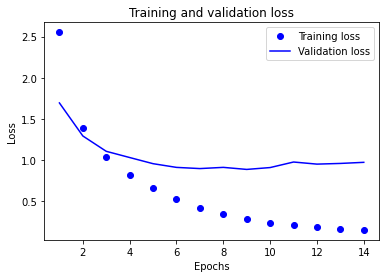

In [17]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

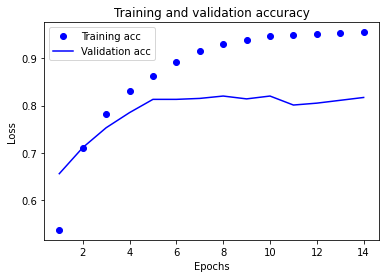

In [18]:
plt.clf() #очистка рисунка
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
predictions = model.predict(X_test)

In [21]:
np.argmax(predictions[0])

3

АЛЬТЕРНАТИВА

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])